# Bootstrapping

## Loading train and test data

In [1]:
#loading training data
train_data <- read.csv("Task1B_train.csv")
train_label <- train_data[1:nrow(train_data),2] #creating the training labels

#loading testing data
test_data <- read.csv("Task1B_test.csv")
test_label <- test_data[1:nrow(test_data),2] #creating the testing labels

In [2]:
#printing out first 5 rows of train data and labels
head(train_data)
head(train_label)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


[1] 1628.75 1606.51 1618.16 1630.75 1635.47 1647.84

In [3]:
#printing out first 5 rows of test data and labels
head(test_data)
head(test_label)

x1,x2,x3,x4,y
1991.500,1613.63,1688.5,1750.5,2460.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.515,1610.61,1671.6,1714.3,2466.8
1991.523,1640.17,1703.6,1757.4,2508.4
1991.531,1645.89,1716.3,1754.3,2497.4
1991.538,1638.35,1730.5,1755.5,2556.8


[1] 1613.63 1621.04 1610.61 1640.17 1645.89 1638.35

In [4]:
#checking the dimensions of train and test datasets
dim(train_data)
dim(test_data)

[1] 930   5

[1] 930   5

## Implementation of bootstrap function

The function bootstrap takes 3 arguments orginal size of dataset(org_size), sample size, and number of datasets(times). It returns a matrix of indices where each row represents indices for one dataset.

In [5]:
#function that generates sample indices for each dataset, which is based on bootstrap technique
bootstrap <- function(org_size, sample_size, times){
    ind <- matrix(nrow=times, ncol=sample_size)
    for(i in 1:times){
        ind[i,] <- sample(x=org_size, size = sample_size, replace = TRUE)
    }
    return(ind)
}

bootstrap(nrow(train_data), 10, 10) #just an example

862,844,916,444,839,154,628,125,822,551
498,360,533,695,552,925,648,308,578,436
441,249,585,124,773,636,428,581,748,423
485,153,385,789,23,623,456,92,550,688
166,635,191,325,233,915,558,487,455,355
796,510,138,910,86,732,498,715,741,107
338,470,631,636,678,657,341,321,23,103
773,846,49,533,52,372,506,277,379,611
605,473,452,476,324,433,383,491,566,250
224,537,515,54,822,785,345,388,576,615


## Implementation of KNN regressor

As mentioned in the question 1, we implement a function of KNN regressor

In [6]:
#function to calcuate the average of the neighbour's values
avg_neighbours <- function(x) {
    avg <- mean(x)
    return(avg)
}

#KNN regressor function
knn_regressor <- function(train_data, train_label, test_data, K=3){
    
    train_len <- nrow(train_data) #length of train data
    test_len <- nrow(test_data) #length of test data
    
    #distance matrix which calculates the distance between data points
    dist <- as.matrix(dist(rbind(test_data, train_data), method= "euclidean"))[1:test_len, (test_len+1):(test_len+train_len)]
    
    regressed_vals <- c() #empty vector to store regressed values
    
    #iterating through the test data points
    for (i in 1:test_len){
        #finding the K nearest neighbours indices
        ind <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2] 
        
        d <- avg_neighbours(train_label[ind]) #calling the avg_distance function, argument as nearest training points
        regressed_vals <- c(regressed_vals, d) #storing the calcuated regressed value int he vector created
    }
    
   return(regressed_vals) #returns the regressed values

}

## Bootstrapping for KNN regression with times = 100 , size = 30, and K = 1 to 20

In [7]:
K <- 20 #maximum K for KNN
S <- 30 #dataset size
T <- 100 #number of datasets

#creating a matrix of indices for each dataset.
#It contains 100 rows, where each row represents a dataset which consists of 30 sample indices.
boot_indx <- bootstrap(nrow(train_data), S, T) 

# a dataframe to store the generated test errors
error <- data.frame('K'=1:K, 'T'=1:T, 'test'=rep(0,T*K))

# for each k value
for (k in 1: K){
    
    # for every dataset
    for (t in 1:T){
        
        # calculate iteration index i
        i <- (k-1)*T+t
        
        # save sample indices that were selected by bootstrap
        indx <- boot_indx[t,]
        
        # store the value of k and t in the dataframe
        error[i,'K'] <- k
        error[i,'T'] <- t
        
        #calling the knn regressor function which returns the regressed values
        y_test <- knn_regressor(train_data[indx,], train_label[indx], test_data, K=k)
    
        #calcuation of root mean square error and storing it in dataframe created above
        error[i, 'test'] <- sqrt(mean((test_label - y_test)^2))

    } 
}

In [8]:
head(error) #printing the first few rows of the dataframe

K,T,test
1,1,211.8296
1,2,203.6174
1,3,182.5693
1,4,107.8505
1,5,180.6968
1,6,129.7080


## Plotting error vs K in a box plot

## Loading libraries

In [9]:
library(reshape) #used to restructure the data in dataframe
library(ggplot2) #used to plot graphs

Warning message:
"package 'reshape' was built under R version 3.4.4"

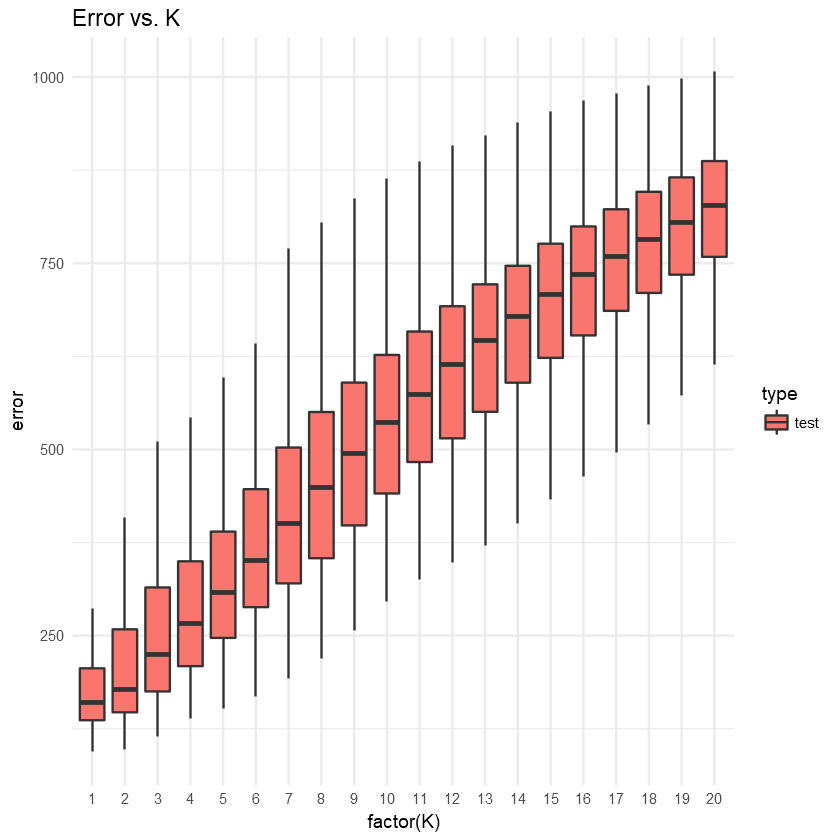

In [10]:
#reshaping the data frame
error_df <- melt(error, id=c('K', 'T')) 
names(error_df) <- c('K', 'T', 'type', 'error') #assigning column names

#plotting errorm vs K in a box plot
ggplot(data=error_df[error_df$type=='test',], aes(factor(K), error,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Error vs. K') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

## Test error and its uncertainity vs. K 

From the above boxplot, we observe that the test error and uncertainity increases as the value of K increases. However, the uncertainity around the error starts to decrease as K becomes higher even though the test error increases.

## Bootstrapping for KNN regression with K = 10, size = 30, and times = 10 to 200

In [ ]:
K <- 10 #K for KNN
S <- 30 #dataset size
T <- seq(10,200,by=10) #creating a sequence of number of datasets

#creating an empty dataframe 
error_df <- data.frame()   

# for each time
for (t in T){
    
    #creating a matrix of indices for each dataset.
    #It contains t rows, where each row represents a dataset which consists of 30 sample indices.
    boot_indx <- bootstrap(nrow(train_data), S, t)
    
    #dataframe to store the error values
    error <- data.frame('T'=t, 'test'=rep(0,t))
    
    #for each dataset
    for (i in 1:t){
        
        # save sample indices that were selected by bootstrap
        indx <- boot_indx[i,]
        
        #storing t value
        error[i,'T'] <- t
        
        #calling the knn regressor function which returns the regressed values
        y_test <- knn_regressor(train_data[indx,], train_label[indx], test_data, K=10)
    
        #calcuation of root mean square error and storing it in dataframe created above
        error[i, 'test'] <- sqrt(mean((test_label - y_test)^2))

} 
    error_df <- rbind(error_df, error) #appending data frame for each time to the dataframe created outside the loop
}

In [ ]:
head(error_df) #printing the first few rows

## Plotting error vs number of datasets(times) in a box plot

In [ ]:
#reshaping the data frame
error_final <- melt(error_df, id= 'T') 
names(error_final) <- c('T', 'type', 'error') #assigning column names

#plotting error vs times in a box plot
ggplot(data=error_final[error_final$type=='test',], aes(factor(T), error,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Error vs. T') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

## Test error and its uncertainity vs Number of datasets used in bootstrapping

From the above box plot, we can see that the test error and uncertainity is least for 20 datasets. But there is absolutely no pattern as the number of datasets increases. The test error and uncertainity is distributed randomly as we increase the number of datasets. 